# Motion Estimation and Event Detection in Video

### Objective
This project detects motion and significant events in a video using frame differencing and histogram comparison methods in OpenCV. We identify regions of motion by analyzing changes in consecutive frames and highlight moments where significant motion events occur based on the intensity of motion.
n.
n.


## Step 1: Loading and Preprocessing the Video

The first step involves loading the video using OpenCV. Each frame of the video is resized for easier visualization, and we convert each frame to grayscale to simplify motion analysis. Grayscale frames reduce computation since we only work with one color channel, which is ideal for detecting intensity-based changes.


In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the video
video_path = r"C:\Users\DELL\Downloads\1528489-uhd_3840_2160_25fps.mp4"
cap = cv2.VideoCapture(video_path)

# Check if video loaded successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

In [110]:
# Parameters for motion detection
motion_threshold = 0.1  # Adjusted threshold based on observed values
event_detected_frames = []
motion_intensity_values = []

# Resize scale factor for smaller display
resize_factor = 0.5

# Read the first frame
ret, previous_frame = cap.read()
if not ret:
    print("Error: Could not read the first frame.")
    exit()


## Step 2: Frame Differencing for Motion Detection and Thresholding for Event Detection

* To detect motion, we use frame differencing to compare consecutive frames. By calculating the absolute difference between consecutive grayscale frames, we identify areas where changes occur, which helps us detect regions of motion. We then calculate a histogram of the frame difference to quantify motion intensity, which allows us to track how much change has occurred between frames.
 
* 
To detect significant motion events, we set a motion intensity threshold. When the calculated motion intensity exceeds this threshold, it indicates that a significant change or event has occurred. These events are marked in the video frames for easy visualization.



In [112]:
# Resize and convert to grayscale
previous_frame = cv2.resize(previous_frame, (0, 0), fx=resize_factor, fy=resize_factor)
previous_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)

frame_count = 0

while True:
    # Read the next frame
    ret, current_frame = cap.read()
    if not ret:
        break
    
    frame_count += 1

    # Resize and convert to grayscale
    current_frame = cv2.resize(current_frame, (0, 0), fx=resize_factor, fy=resize_factor)
    current_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    
    # Compute frame difference
    diff_frame = cv2.absdiff(previous_gray, current_gray)
    
    # Calculate motion intensity using histogram comparison with correlation metric
    hist_previous = cv2.calcHist([previous_gray], [0], None, [256], [0, 256])
    hist_current = cv2.calcHist([current_gray], [0], None, [256], [0, 256])
    motion_intensity = cv2.compareHist(hist_previous, hist_current, cv2.HISTCMP_CORREL)
    motion_intensity_values.append(motion_intensity)
    
    # Threshold the difference image to get regions of motion
    _, motion_mask = cv2.threshold(diff_frame, 25, 255, cv2.THRESH_BINARY)

    # Detect significant motion events
    if motion_intensity < motion_threshold:  # Lower values indicate significant difference for correlation
        event_detected_frames.append((frame_count, cap.get(cv2.CAP_PROP_POS_MSEC)))
        cv2.putText(current_frame, f"Event Detected", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    
    # Highlight moving regions on the frame
    contours, _ = cv2.findContours(motion_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(current_frame, (x, y), (x + w, y + h), (0, 255, 0), 1)

    # Show the frame with highlighted motion
    cv2.imshow("Motion Detection (Resized)", current_frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

    # Update for the next frame
    previous_gray = current_gray

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()

# Print detected events with timestamps
print("Detected Events:")
for frame, timestamp in event_detected_frames:
    print(f"Event detected at frame {frame}, timestamp: {timestamp:.2f} ms")




Detected Events:
Event detected at frame 764, timestamp: 30560.00 ms
Event detected at frame 765, timestamp: 30600.00 ms
Event detected at frame 766, timestamp: 30640.00 ms


## Step 4: Visualizing Motion Intensity and Detected Events

The motion intensity is plotted over the frames to visualize changes in motion throughout the video. Significant events, where the motion intensity exceeds the threshold, are marked with red dots on the graph. This provides a visual representation of when and where events occur.


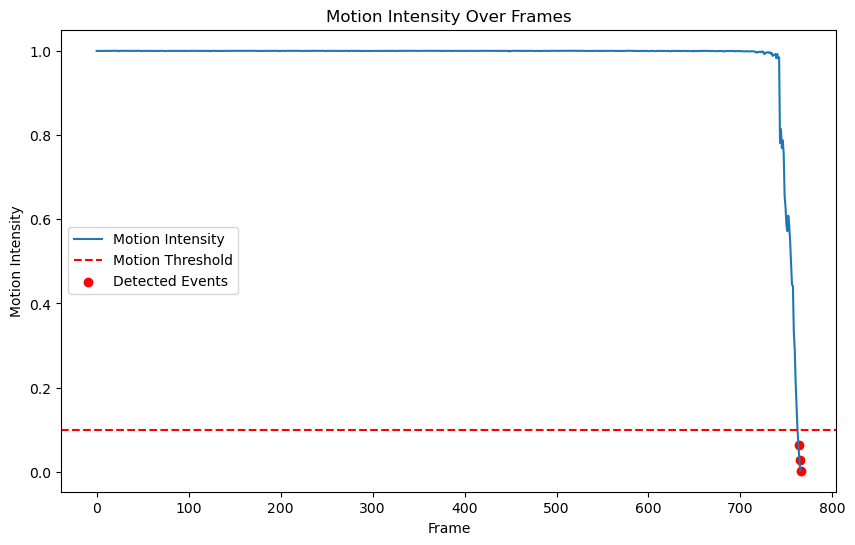

In [82]:
# Plot motion intensity over time
plt.figure(figsize=(10, 6))
plt.plot(motion_intensity_values, label='Motion Intensity')
plt.axhline(y=motion_threshold, color='r', linestyle='--', label='Motion Threshold')
plt.title("Motion Intensity Over Frames")
plt.xlabel("Frame")
plt.ylabel("Motion Intensity")
plt.legend()

# Highlight frames with detected events on the plot
event_frames = [frame for frame, _ in event_detected_frames]
event_intensity = [motion_intensity_values[frame - 1] for frame in event_frames]
plt.scatter(event_frames, event_intensity, color='red', marker='o', label='Detected Events')

plt.legend()
plt.show()